In [111]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
%matplotlib inline

In [31]:
wine_ds = pd.read_csv("./winequality-red.csv")

In [8]:
wine_ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
wine_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
wine_ds.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [32]:
bins = (0,6.5,8)
group_names = ["bad","good"]
wine_ds["quality"] = pd.cut(wine_ds["quality"],bins=bins,labels=group_names)

In [35]:

print(wine_ds["quality"].head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: quality, dtype: category
Categories (2, object): ['bad' < 'good']


In [57]:
label_quality = LabelEncoder()

In [56]:
wine_ds["quality"] = label_quality.fit_transform(wine_ds["quality"])

In [58]:
print(wine_ds["quality"].head(10))

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    0
Name: quality, dtype: int64


In [50]:
wine_ds["quality"].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

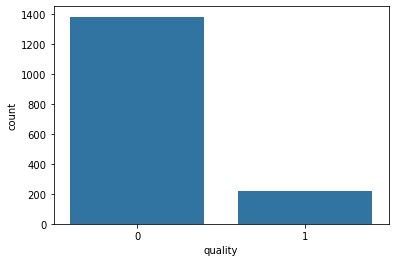

In [73]:
sns.countplot( x = "quality", data = wine_ds)

In [80]:
X = wine_ds.drop("quality",axis=1)
y = wine_ds["quality"]
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [85]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [89]:
print(X_train)
print(X_test)

[[ 0.21833164  0.88971201  0.19209222 ...  1.09349989  0.45822284
   1.12317723]
 [-1.29016623 -1.78878251  0.65275338 ... -0.40043872 -0.40119696
   1.40827174]
 [ 1.49475291 -0.78434707  1.01104539 ... -0.07566946  0.51551749
  -0.58738978]
 ...
 [-0.65195559  0.49909822 -1.08752211 ...  1.28836145 -0.68767023
  -0.87248428]
 [-0.24582155 -1.84458448  0.39683051 ...  0.05423824  0.80199076
   1.40827174]
 [-1.46422367 -1.34236676 -0.06383064 ...  0.50891521 -0.68767023
   2.92877575]]
[[-3.61859850e-01  1.64286407e-01 -9.85152962e-01 ... -4.65392578e-01
  -1.34389336e-04 -7.77452782e-01]
 [-3.03840702e-01 -1.70525408e-01 -5.24491803e-01 ...  5.08915214e-01
  -1.03143815e+00 -8.72484283e-01]
 [ 1.37871461e+00  7.78108067e-01 -2.68568937e-01 ... -2.05577167e-01
   1.83329452e+00 -4.92358280e-01]
 ...
 [-1.37449586e-02  3.87494284e-01 -1.15015218e-01 ... -1.04997725e+00
  -7.44964886e-01 -5.87389780e-01]
 [ 2.76350785e-01 -1.45397070e+00  6.01568807e-01 ... -1.04997725e+00
   1.71749571

# Random Forest Classifier

In [92]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

In [102]:
 print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.71      0.53      0.61        47

    accuracy                           0.90       320
   macro avg       0.82      0.75      0.78       320
weighted avg       0.89      0.90      0.89       320

[[263  10]
 [ 22  25]]


# SVM Classifier

In [106]:
clf = SVC()
clf.fit(X_train,y_train)
pred_clf = clf.predict(X_test)

In [108]:
print(classification_report(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


# Neural Network

In [117]:
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=5000)
mlpc.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(11, 11, 11), max_iter=5000)

In [119]:
pred_mlpc = mlpc.predict(X_test)

In [120]:
print(classification_report(y_test,pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       273
           1       0.59      0.57      0.58        47

    accuracy                           0.88       320
   macro avg       0.76      0.75      0.75       320
weighted avg       0.88      0.88      0.88       320

[[254  19]
 [ 20  27]]
